# Data Mining Final Project: Car Prices Prediction

## 1. Introduction and Data Inspection

With the prices of computer chips increasing every year, car prices is a hot topic. For this final project, our group decided to predict the prices of cars, which might be helpful for anyone who’s looking to purchase cars or making an investment in cars in the future. The goal of this project is to use regression analysis to predict the car prices based on multiple features of the car. The questions we are trying to answer are:


1.   What features have the most impact on car prices?
2.   What are the pricing dynamics of the current car market?





In [ ]:
#importing the needed libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Imports
import os
from google.colab import drive

# Access Google Drive
drive.mount('/content/drive', force_remount=True)
dir = '/content/drive/My Drive/Data Mining Final Project/'

# Load Dataset
car = pd.read_csv(os.path.join(dir, 'CarPrice_Assignment.csv'))

Mounted at /content/drive


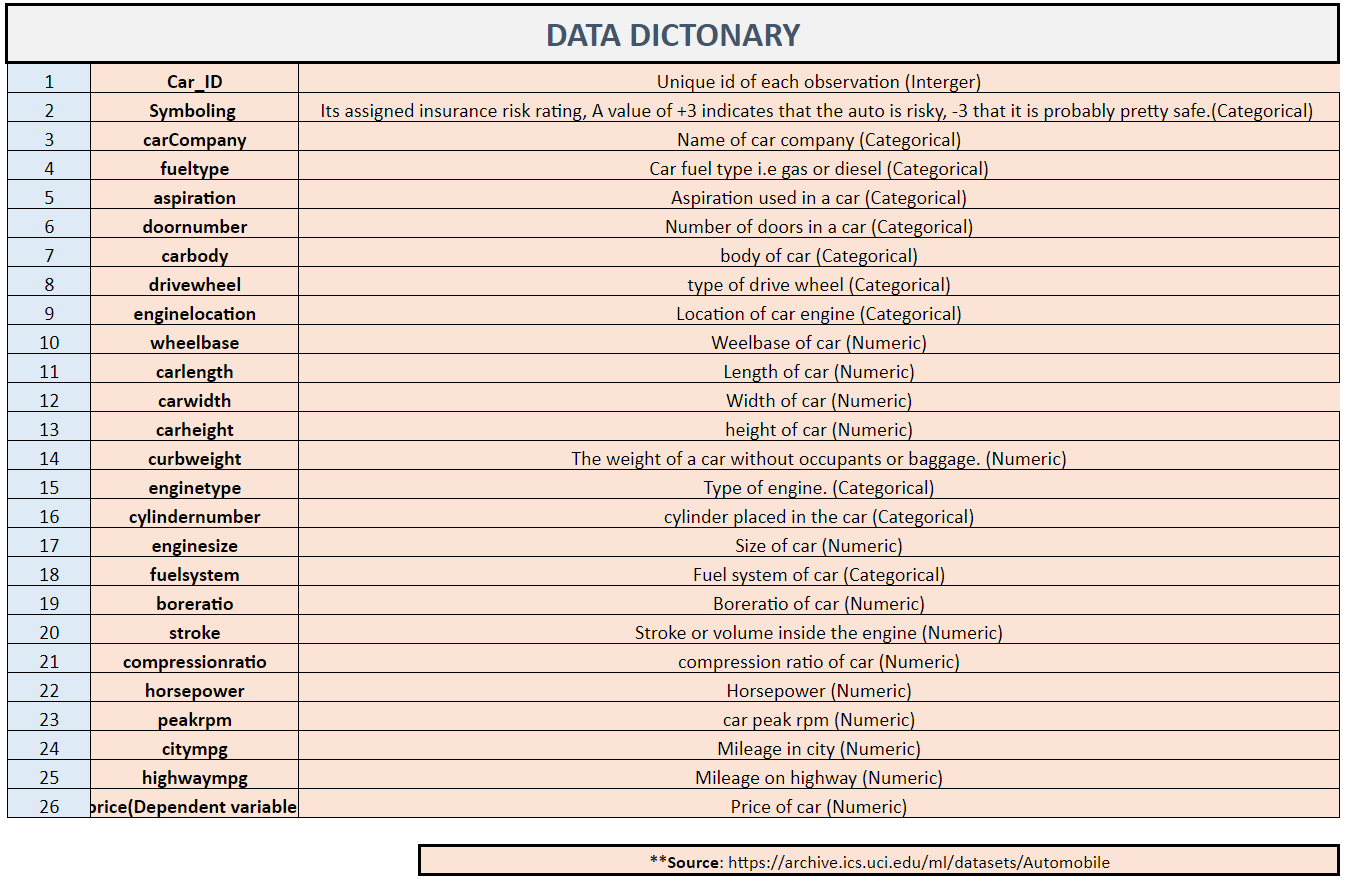

In [ ]:

car_copy = car
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car.shape

(205, 26)

In [ ]:
#checking the amount and name of columns
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
#checking the tyoe for each feature
car.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int64  
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int64  
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# calculate statistics of numerical values
car.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 2. Data Visualization and Preprocessing

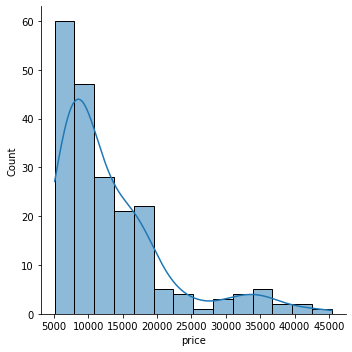

In [ ]:
# visualizing the features
sns.displot(car['price'], kde=True)

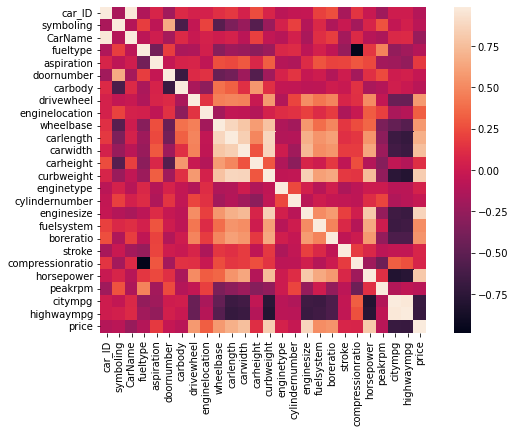

In [ ]:
#visulaizing data set using heatmap
from matplotlib import pyplot as plt
import seaborn as sns 
plt.subplots(figsize=(10,6))
sns.heatmap(car.corr(), vmax=0.99, square=True)

In [ ]:
#converting the object into int
col_list = list(car.columns)

for i in col_list:
    if car[i].dtype == 'object':
        car[i]=le.fit_transform(car[i])

In [ ]:
#checking for the amount of nulls
nulls = car.isna().sum()[car.isna().sum() > 200]
nulls

Series([], dtype: int64)

In [ ]:
car_cols = list(car.nunique()[car.nunique() < len(car) / 5].index)
car_cols

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'peakrpm',
 'citympg',
 'highwaympg']

In [ ]:
car_cat = car.filter(items=car_cols)

In [ ]:
car_num = car.filter(items=list(set(car.columns) - set(car_cols)))

In [ ]:
car_num.fillna(value = 0, inplace = True)

In [ ]:
car_num.isna().any()

carheight     False
car_ID        False
carwidth      False
CarName       False
wheelbase     False
curbweight    False
horsepower    False
carlength     False
price         False
enginesize    False
dtype: bool

In [ ]:
X_num = car_num.drop(columns = 'price', axis = 1)
y_num = car_num.price

## 3. Modeling and Experimenting

In [ ]:
#test number 1
linearmodel1 = LinearRegression()

In [ ]:
count = 0
for i in range(0, 1460):
    X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, test_size = .2) 
    linearmodel1.fit(X_num_train, y_num_train)
    count = count + linearmodel1.score(X_num_test, y_num_test)
print(count/1460)

0.7970595483484348


In [ ]:
#categorizing the data for Test number 2

In [ ]:
X = car_copy.drop('price',axis = 1)
y = car.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)

In [ ]:
X1_train = X_train[['CarName', 'fueltype', 'carbody', 'drivewheel', 'enginetype', 'enginelocation',
                  'enginesize','horsepower','peakrpm','citympg','highwaympg']]

X1_test = X_test[['CarName', 'fueltype', 'carbody', 'drivewheel', 'enginetype', 'enginelocation',
                  'enginesize','horsepower','peakrpm','citympg','highwaympg']]

y1_train = y_train

y1_test = y_test

In [ ]:
linearmodel2 = LinearRegression().fit(X1_train,y1_train)

In [ ]:
coeff = linearmodel2.score(X1_train, y1_train)
print('Coefficient of Determination for test2:', coeff)

Coefficient of Determination for test2: 0.8569204352265463


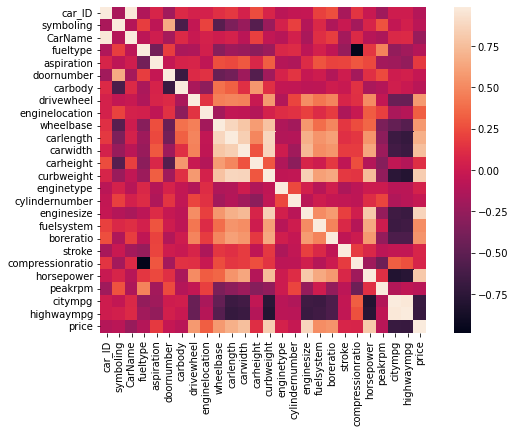

In [ ]:
#testing number 3
from matplotlib import pyplot as plt
import seaborn as sns 
plt.subplots(figsize=(10,6))
sns.heatmap(car.corr(), vmax=0.99, square=True)

In [ ]:
#not done yet

In [ ]:
#test Number 4

threshold = 300
car = car.drop(list(car.isna().sum()[car.isna().sum() > threshold].index), axis=1)

In [ ]:
X = car.drop(['price'], axis=1)
y = car['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
car_data = X_train.copy()
car_data['price'] = y_train
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
10,11,2,10,1,0,1,3,2,0,101.2,...,108,5,3.50,2.80,8.8,101,5800,23,29,16430.0
78,79,2,68,1,0,1,2,1,0,93.7,...,92,1,2.97,3.23,9.4,68,5500,31,38,6669.0
170,171,2,127,1,0,1,1,2,0,98.4,...,146,5,3.62,3.50,9.3,116,4800,24,30,11199.0
76,77,2,65,1,0,1,2,1,0,93.7,...,92,1,2.97,3.23,9.4,68,5500,37,41,5389.0
156,157,0,125,1,0,0,3,1,0,95.7,...,98,1,3.19,3.03,9.0,70,4800,30,37,6938.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,7,1,5,1,0,0,3,1,0,105.8,...,136,5,3.19,3.40,8.5,110,5500,19,25,17710.0
79,80,1,63,1,1,1,2,1,0,93.0,...,98,6,3.03,3.39,7.6,102,5500,24,30,7689.0
42,43,1,40,1,0,1,3,1,0,96.5,...,110,1,3.15,3.58,9.1,100,5500,25,31,10345.0
70,71,-1,22,0,1,0,3,2,0,115.6,...,183,3,3.58,3.64,21.5,123,4350,22,25,31600.0


In [ ]:
cor_threshold = car_data.corr()['price'].median() - 0.1
features = list(car_data.corr()[np.abs(car_data.corr()['price']) > cor_threshold]['price'].index)
features.remove('price')

features

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [ ]:
X_train = X_train[features]
X_test = X_test[features]

In [ ]:
X_train = X_train.dropna()
X_test = X_test.dropna()

In [ ]:
def drop_IDS(X, y):
    drop = []
    for y_id in y.index:
        if y_id not in X.index:
            drop.append(y_id)
    return drop

In [ ]:
y_train = y_train.drop(drop_IDS(X_train, y_train))
y_test = y_test.drop(drop_IDS(X_test, y_test))

In [ ]:
#using pipeline #test4
pipeline1 = Pipeline([
    ('scalar', StandardScaler()),
    ('linear', LinearRegression(positive=True))
])
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('linear', LinearRegression(positive=True))])

In [ ]:
pipeline1.score(X_test, y_test)

0.873508744594913